In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as md 
import string as st 

In [2]:
# input params 
num_itr = 3  # Number of iterations
sim_time = 1500001  # in ps 
time = np.arange(sim_time)*1e-3 # in ns
#When the temperature is 360.000000 kelvin kT is equal to 0.715393 kcal/mol
kt = 0.715393

(5, 2, 121)


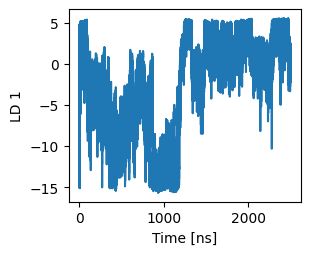

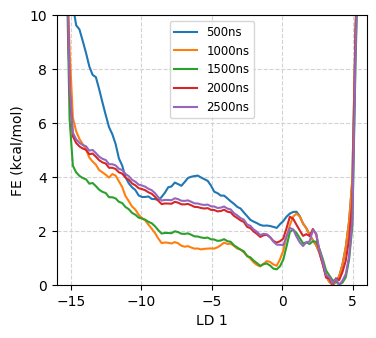

In [3]:
# load data from 1st iteration separately (which is original 2.5us sim from paper)

t, ld1_1st, opes_rbias_1st = np.loadtxt("itr_1/COLVAR", usecols=(0,1,2), unpack=True)
t *= 1e-3 # in ns 

plt.figure(figsize=(3,2.5))
plt.ylabel("LD 1")
plt.xlabel("Time [ns]")
plt.plot(t, ld1_1st)

# load multiple fes files (500ns, 1000ns, ..., 2500ns)

store_fes = []
for i in range(1,6):
    fes = np.loadtxt('itr_1/fes_ld1_state_%dns.dat'%int(i*500), usecols=(0,1), unpack=True)
    store_fes.append(fes)
store_fes = np.array(store_fes)
print(store_fes.shape)

plt.figure(figsize=(4,3.5))
plt.xlabel("LD 1")
plt.ylabel("FE (kcal/mol)")
plt.ylim(0,10.0)
plt.xlim(-16,6.0)
plt.grid(axis='both', which='major', linestyle="--", color='lightgrey')
for i in range(1,store_fes.shape[0]+1):
    plt.plot(store_fes[i-1,0,:], store_fes[i-1,1,:]/4.184, lw=1.5, label="%dns"%int(i*500))
plt.legend(fontsize='small')

In [4]:
# load colvar data 

# initialize 
ld1_data = np.empty([sim_time, num_itr-1])
opes_rbias_data = np.empty([sim_time, num_itr-1])
ld1_fes_data = []

for i in range(num_itr-1):
    path = "itr_%d"%(i+2)
    ld1_data[:,i], opes_rbias_data[:,i] = np.loadtxt(path+"/COLVAR", usecols=(1,2), unpack=True)
    
    xvals = []
    # lopp over 3 fes (500ns, 1000ns, 1500ns)
    for j in range(3):
        x = np.loadtxt(path+"/fes_ld1_state_%dns.dat"%int((j+1)*500), usecols=(0,1))
        #print(x.shape)
        xvals.append(x)
    
    ld1_fes_data.append(xvals)

ld1_fes_data = np.array(ld1_fes_data)
print(ld1_fes_data.shape)

# cal weights 
wgts_data = np.exp(opes_rbias_data/kt)
print(wgts_data.shape)

(2, 3, 121, 2)
(1500001, 2)


In [5]:
print(ld1_data.shape)
print(opes_rbias_data.shape)
print(ld1_fes_data.shape)

(1500001, 2)
(1500001, 2)
(2, 3, 121, 2)


### SI figure : hp35 : LD1 vs. time  

In [6]:
print(ld1_1st.shape, time.shape)

(2500001,) (1500001,)


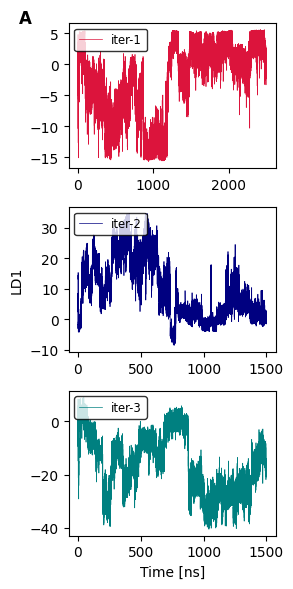

In [7]:
# make the ld1 vs. time plot
colors = ['crimson', 'navy', 'teal', 'darkgoldenrod']

fig, axs = plt.subplots(3, 1, figsize=(3,6))
axs = axs.reshape([-1])

# 1.5us
#axs[0].plot(time, ld1_1st[:time.shape[0]:], color=colors[0], lw=0.5, alpha=1.0, label='iter-1')

# 2.5us
axs[0].text(-0.24, 1, st.ascii_uppercase[0], fontweight='bold', fontsize=12, transform=axs[0].transAxes)
axs[0].plot(np.arange(ld1_1st.shape[0])*1e-3, ld1_1st, color=colors[0], lw=0.5, alpha=1.0, label='iter-1')

axs[0].legend(loc='upper left', fontsize='small', edgecolor='k')


axs[1].set_ylabel('LD1')
axs[2].set_xlabel('Time [ns]')

for i in range(num_itr-1):
    axs[i+1].plot(time, ld1_data[:,i], color=colors[i+1], lw=0.5, alpha=1.0, label='iter-%d'%(i+2))
    axs[i+1].legend(loc='upper left', fontsize='small', edgecolor='k')
    
fig.tight_layout()

# save
plt.savefig("new_hp35_ld1_vs_time.pdf", format="pdf")

In [8]:
# load desres fes from all 
desres_fes_data = []
for i in range(num_itr):
    fes = np.loadtxt("itr_%d/desres_fes.dat"%(i+1), usecols=(0,1))
    print(fes.shape)
    desres_fes_data.append(fes)
desres_fes_data = np.array(desres_fes_data)
print(desres_fes_data.shape)

(120, 2)
(120, 2)
(120, 2)
(3, 120, 2)


In [9]:
print(ld1_fes_data.shape)
print(store_fes.shape)

(2, 3, 121, 2)
(5, 2, 121)


### SI figure : hp35 : FES vs. LD1

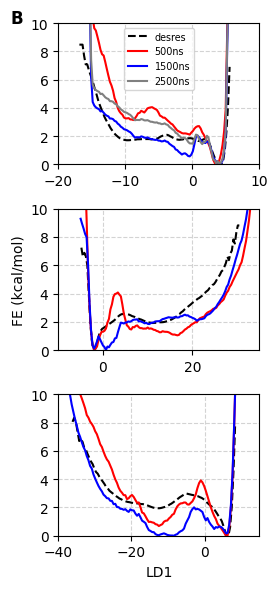

In [10]:
# make the FE vs. LD1 plot
l_colors = ['r', 'g', 'b']

fig, axs = plt.subplots(3, 1, figsize=(3,6), sharey=True)
axs = axs.reshape([-1])
xlims = [[-20,10], [-10,35], [-40,15], [-15,5]]

axs[0].text(-0.24, 1, st.ascii_uppercase[1], fontweight='bold', fontsize=12, transform=axs[0].transAxes)
axs[0].set_ylim(0,10.0)
axs[0].set_xlim(xlims[0])
axs[0].grid(axis='both', which='major', linestyle="--", color='lightgrey')
axs[0].plot(desres_fes_data[0,:,0], desres_fes_data[0,:,1], color='k', lw=1.5, ls="--", label='desres')
for i in range(3):
    if i != 1:
        axs[0].plot(store_fes[i,0,:], store_fes[i,1,:]/4.184, lw=1.5, color=l_colors[i], label='%dns'%int((i+1)*500))
axs[0].plot(store_fes[4,0,:], store_fes[4,1,:]/4.184, lw=1.5, color='grey', label='2500ns')
axs[0].legend(fontsize='x-small', loc='upper center')

axs[1].set_ylabel('FE (kcal/mol)')
axs[2].set_xlabel('LD1')

for i in range(1,num_itr):
    axs[i].set_xlim(xlims[i])
    axs[i].grid(axis='both', which='major', linestyle="--", color='lightgrey')
    axs[i].plot(desres_fes_data[i,:,0], desres_fes_data[i,:,1], color='k', lw=1.5, ls="--")
    
    for j in range(3):
        if j !=1:
            axs[i].plot(ld1_fes_data[i-1,j,:,0], ld1_fes_data[i-1,j,:,1]/4.184, color=l_colors[j], lw=1.5)

fig.tight_layout()

# save
plt.savefig("new_hp35_fes_vs_ld1.pdf", format="pdf")

In [11]:
print(store_fes.shape)

(5, 2, 121)


In [12]:
# load all the LD1 coefficients data
num_atoms = 101
ld1_coeff_data = np.empty([num_atoms*3, num_itr])

for i in range(num_itr):
    path = "itr_%d"%(i+1)
    if i == 0:
        ld1_coeff_data[:,i] = np.loadtxt(path+"/lda_scalings_global_folded_unfolded_ld1.txt")
    elif i == 2:
        ld1_coeff_data[:,i] = np.loadtxt(path+"/ld1_4states_scalings.txt")
    else:
        ld1_coeff_data[:,i] = np.loadtxt(path+"/ld1_3states_scalings.txt")
    
print(ld1_coeff_data.shape)

(303, 3)


### SI figure : hp35 : LDA coeffs

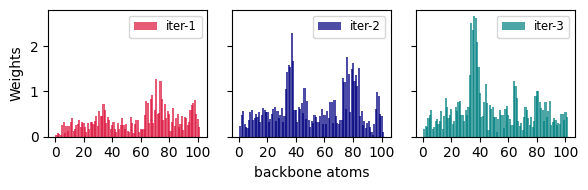

In [13]:
# make a stacked bar char with weights 
fig, axs = plt.subplots(1, num_itr, figsize=(6,2), sharex=True, sharey=True)

for i in range(num_itr):
    #axs[i].set_box_aspect(1)
    vals = np.sqrt(np.sum(np.square(ld1_coeff_data[:,i].reshape(num_atoms,3)), axis=1))
    axs[i].set_xticks([0, 20,40,60,80, 100])
    axs[i].bar(np.arange(num_atoms)+1, vals, width=1.5, color=colors[i], align='center', label="iter-%d"%(i+1), alpha=0.7)
    axs[i].legend(fontsize='small')

axs[0].set_ylabel('Weights')
axs[1].set_xlabel('backbone atoms')
fig.tight_layout()

# save
plt.savefig("new_hp35_lda_coeffs.pdf", format="pdf")

## RMSD calculations performed using MDAnalysis

In [14]:
from MDAnalysis.analysis.rms import rmsd

In [15]:
store_rmsd_data = []
for i in range(num_itr):
    rx = np.load('rmsd_data_iter-%d_mda.npy'%(i+1))
    store_rmsd_data.append(rx)

In [16]:
print(store_rmsd_data[0].shape)

(50000, 3)


### SI figure : hp35 : 2D FES on RMSDs

/state/partition1/job-60921149/ipykernel_1223436/3872647277.py:24: RuntimeWarning: divide by zero encountered in log
  H = -kt*np.log(H.T)


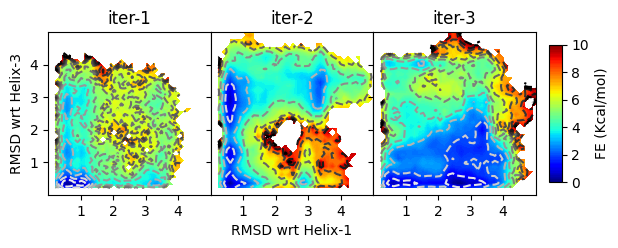

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(6.5,2.5), sharex=True, sharey=True)
axs = axs.reshape([-1])

for i in range(num_itr):
    if i == 0:
        wgts = np.exp(opes_rbias_1st[::50]/kt)
        x = store_rmsd_data[i][:,0]
        y = store_rmsd_data[i][:,2]
        
        # for 1st iteration the data was less frequently saved but actually upto 2.5us is present
        # to be consistent here we are going to use only first 1.5us data
        #x = store_rmsd_data[i][:,0][:30000:]
        #y = store_rmsd_data[i][:,2][:30000:]
        #wgts = wgts[:30001:]
    else:
        wgts = np.exp(opes_rbias_data[::5,i-1]/kt)
        x = store_rmsd_data[i][:,0]  # h1,h2,h3 (0,1,2)
        y = store_rmsd_data[i][:,2]
    
    # histogram
    H, xedges, yedges = np.histogram2d(x,y,bins=40,density=True, weights=wgts[1:])
    xcenters = (xedges[:-1] + xedges[1:]) / 2
    ycenters = (yedges[:-1] + yedges[1:]) / 2
    H = -kt*np.log(H.T)  
    H -= H.min()
    xx, yy = np.meshgrid(xcenters, ycenters)
    
    # plot
    axs[i].set_ylim(0,5)
    axs[i].set_xlim(0,5)
    axs[i].set_yticks(np.arange(1,5))
    axs[i].set_xticks(np.arange(1,5))
    axs[i].set_box_aspect(1.0)
    axs[i].set_title("iter-%d"%(i+1))
    #axs[i].grid(which='major', axis='both', color='#808080', linestyle="dashed")
    im = axs[i].contourf(xx, yy, H, cmap='jet', levels=np.arange(0,10.1,0.1))
    axs[i].contour(xx, yy, H, levels=15, vmax=10, linestyles="--", cmap='binary')
    axs[i].tick_params(axis='both')

axs[1].set_xlabel('RMSD wrt Helix-1')
axs[0].set_ylabel('RMSD wrt Helix-3')
# Create a common colorbar
cbar_ax = fig.add_axes([0.87, 0.25, 0.02, 0.55])  # [x, y, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[0,2,4,6,8,10])

# Optionally, add a label to the colorbar
cbar.set_label('FE (Kcal/mol)')
    

#fig.tight_layout()
fig.subplots_adjust(wspace=0, top=0.95, bottom=0.1, right=0.85, left=0.1)

# save 
plt.savefig('new_hp35_2d_fes_rmsd.pdf', format='pdf')

### Compare only the first two iterations here 

In [18]:
final_fes_data = []

for i in range(num_itr):
    fes = np.loadtxt('itr_%d/fes_ld1_state_final.dat'%(i+1), usecols=(0,1))
    final_fes_data.append(fes)

final_fes_data = np.array(final_fes_data)
print(final_fes_data.shape)

(3, 121, 2)


### SI figure : HP35 : FE vs. LD1 extended long 

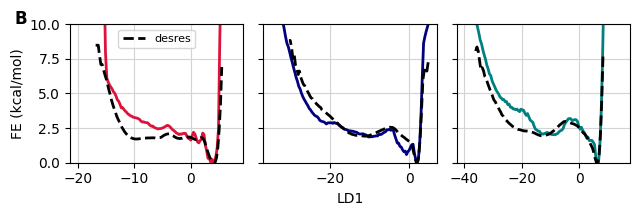

In [19]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(6.5,2.2))
axs = axs.reshape([-1])
axs[1].set_xlabel('LD1')
axs[0].set_ylabel('FE (kcal/mol)')

axs[0].text(-0.32, 1, st.ascii_uppercase[1], fontweight='bold', fontsize=12, transform=axs[0].transAxes)
axs[0].set_ylim(0,10)
for i in range(num_itr):
    X = final_fes_data[i]
    X_ref = desres_fes_data[i]

    axs[i].set_box_aspect(0.8)
    if i == 1:
        mult=-1
    else:
        mult=1
    
    axs[i].grid(axis='both', which='major', linestyle='-', color='lightgrey')
    axs[i].plot(X[:,0]*mult, X[:,1]/4.184, lw=2.0, color=colors[i])
    axs[i].plot(X_ref[:,0]*mult, X_ref[:,1], lw=2.0, color='k', linestyle='--', label='desres')
    
    if i==0:
        axs[i].legend(fontsize=8, loc='upper center')

fig.tight_layout()

# save 
plt.savefig('new_hp35_fes_vs_ld1_extend.pdf', format='pdf')

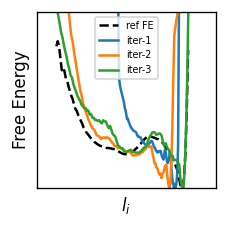

In [39]:
### make a toc 
X_ref = desres_fes_data[2]
c = 1
clrs = ['tab:blue', 'tab:orange', 'tab:green']

fig, ax = plt.subplots(1,1, figsize=(2,2), sharex=True, sharey=True, dpi=120)
ax.set_xlabel('$l_i$')
ax.set_ylabel('Free Energy')
ax.plot(X_ref[:,0]*c, X_ref[:,1], lw=1.5, color='k', linestyle='--', label='ref FE')
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(0,10)
for i in range(num_itr):
    X = final_fes_data[i]
    if i == 1:
        mult=-1
    else:
        mult=1
    ax.plot(X[:,0]*mult, X[:,1]/4.184, lw=1.5, color=clrs[i], label='iter-%d'%(i+1))
ax.legend(fontsize='xx-small', loc='upper center')
fig.tight_layout()
plt.savefig('toc_1.pdf', format='pdf')

### let's check the convergence of FE vs. LD1 

In [40]:
## load fe vs. ld1 data every 100ns 

#intvl_ = 100000  # every 100ns
num_files_ = 35
num_bins_ = 120

itr_1_fes_data = np.empty([100, num_bins_])  # this run was upto 10us, so we will load 100 files every 100ns
itr_2_fes_data = np.empty([num_files_, num_bins_])
itr_3_fes_data = np.empty([num_files_, num_bins_])

# note: states files are written every 5ns. but we load here every 100ns

for i in range(1, num_files_+1):
    a2 = np.loadtxt('itr_2/deposit_all_fes_from_STATES/hp35_1d_fes_%d'%(i*20), usecols=1)/4.184
    a3 = np.loadtxt('itr_3/deposit_all_fes_from_STATES/hp35_1d_fes_%d'%(i*20), usecols=1)/4.184
    
    itr_2_fes_data[i-1,:] = (a2[1:]+a2[:-1])/2
    itr_3_fes_data[i-1,:] = (a3[1:]+a3[:-1])/2
    
for i in range(1, 101, 1):
    a1 = np.loadtxt('itr_1/deposit_all_fes_from_STATES/hp35_1d_fes_%d'%(i*20), usecols=1)/4.184
    itr_1_fes_data[i-1,:] = (a1[1:]+a1[:-1])/2
    
all_itr_fes_data = [itr_1_fes_data, itr_2_fes_data, itr_3_fes_data]

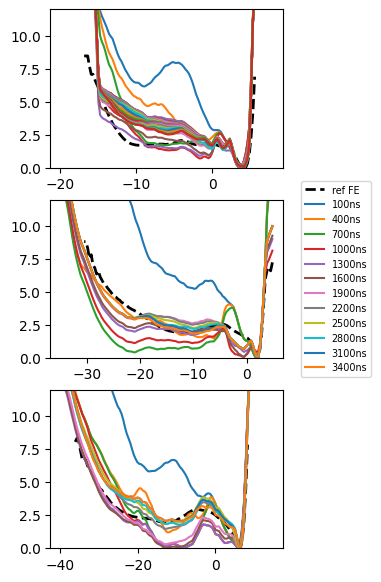

In [41]:
fig, axs = plt.subplots(3,1, figsize=(3,7), sharey=True)
axs = axs.reshape([-1])

axs[0].set_ylim(0,12)
for i in range(3):
    if i == 1:
        mult = -1
    else:
        mult = 1
    axs[i].plot(desres_fes_data[i][:,0]*mult, desres_fes_data[i][:,1], 'k--', lw=2.0, label='ref FE')
    
    for j in range(0,all_itr_fes_data[i].shape[0],3):
        axs[i].plot(desres_fes_data[i][:,0]*mult, all_itr_fes_data[i][j,:], label="%dns"%((j+1)*100))
            
axs[1].legend(loc='center right', fontsize='x-small', bbox_to_anchor=[1.4,0.5])

In [42]:
## calculate MAE w.r.t D.E.Shaw reference free energies
cut_off = 7.5
all_itr_err_data = []
for i in range(3):
    Xi = all_itr_fes_data[i]
    ref_i = desres_fes_data[i,:,1]
    err_list = np.empty(Xi.shape[0])
    
    for j in range(Xi.shape[0]):
        curr_j = Xi[j,:]    
        err_list[j] = np.mean(np.abs(curr_j-ref_i)[ref_i < cut_off])
        
    all_itr_err_data.append(err_list)

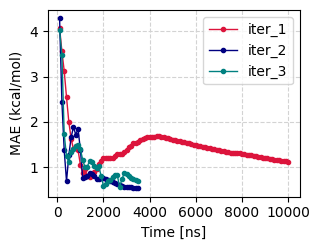

In [43]:
plt.figure(figsize=(3.3,2.6))
plt.ylabel('MAE (kcal/mol)')
plt.xlabel('Time [ns]')
for i in range(3):
    plt.plot((np.arange(all_itr_err_data[i].shape[0])+1)*100, all_itr_err_data[i], '.-', label='iter_%d'%(i+1), lw=1, color=colors[i])
plt.grid(axis='both', which='major', ls='--', color='lightgrey')
plt.legend()
plt.tight_layout()

# save 
plt.savefig('hp35_1d_error_convg.pdf', format='pdf')

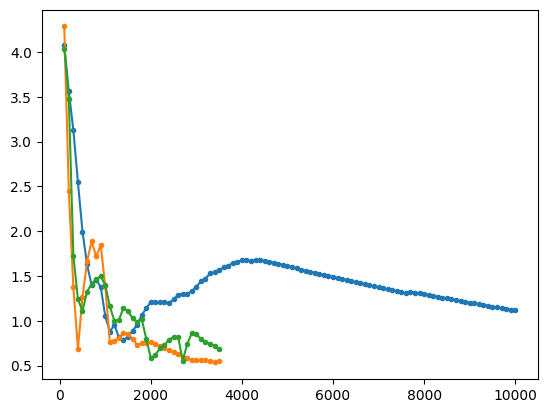

In [44]:
for i in range(3):
    plt.plot((np.arange(all_itr_err_data[i].shape[0])+1)*100, all_itr_err_data[i], '.-', label='iter_%d'%(i+1))

In [45]:
print(desres_fes_data.shape)

(3, 120, 2)


### MT figure : HP35 : only first two iterations of 1D FE vs. LD1 

In [46]:
# << load colvar data from extended simulations >>

# initialize 
ld1_data_long = []
wgts_data_long = []

for i in range(num_itr):
    path = "itr_%d"%(i+1)
    x_, b_ = np.loadtxt(path+"/COLVAR_full", usecols=(1,2), unpack=True)
    print(x_.shape, b_.shape)
    
    ld1_data_long.append(x_)
    wgts_data_long.append(np.exp(b_/kt))

(10474936,) (10474936,)
(3511201,) (3511201,)
(3500001,) (3500001,)


### SI figure : hp35 : LD1 vs. Time (extended sim)

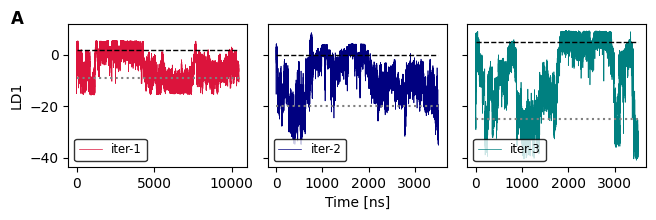

In [47]:
##### make the ld1 vs. time plot
#colors = ['r', 'b', 'g', 'k']
colors = ['crimson', 'navy', 'teal', 'darkgoldenrod']

hlines_locs = [[2,-9], [0, -20], [5, -25]]

fig, axs = plt.subplots(1, 3, figsize=(6.5,2.2), sharey=True)
axs = axs.reshape([-1])

axs[0].text(-0.32, 1, st.ascii_uppercase[0], fontweight='bold', fontsize=12, transform=axs[0].transAxes)
for i in range(num_itr):
    axs[i].set_box_aspect(0.8)
    if i == 1:
        mult=-1
    else:
        mult=1
    
    axs[i].plot(np.arange(ld1_data_long[i].shape[0])*1e-3, ld1_data_long[i]*mult, color=colors[i], lw=0.5, alpha=1.0, label='iter-%d'%(i+1))
    axs[i].legend(fontsize='small', loc='lower left', edgecolor='k')
    
    axs[i].hlines(hlines_locs[i][0], 0, ld1_data_long[i].shape[0]*1e-3, color='black', alpha=1, linestyle='--', lw=1)
    axs[i].hlines(hlines_locs[i][1], 0, ld1_data_long[i].shape[0]*1e-3, color='grey', alpha=1, linestyle=':', lw=1.5)
    
axs[1].set_xlabel("Time [ns]")
axs[0].set_ylabel("LD1")
fig.tight_layout(pad=0.5)
#fig.subplots_adjust(wspace=0.0, hspace= 0.2, bottom=0.13, right=0.89, left=0.13, top=0.94)

# save
plt.savefig("new_hp35_ld1_vs_time_extend_sim.pdf", format="pdf")

In [48]:
collect_rmsd_data = []
for i in range(num_itr-1):
    R = np.load("extend_rmsd_data_iter-%d_mda.npy"%(i+2))
    collect_rmsd_data.append(R)

In [49]:
print(collect_rmsd_data[0].shape)
print(collect_rmsd_data[1].shape)
#print(collect_rmsd_data[2].shape)

(702241, 3)
(700000, 3)


In [50]:
print(wgts_data_long[1][::5].shape)
print(wgts_data_long[2][::5].shape)
#print(wgts_data_long[3][1::5].shape)

(702241,)
(700001,)


### SI figure: hp35 : 2D FES on rmsd space (usign extended sim)

/state/partition1/job-60921149/ipykernel_1223436/3445640983.py:14: RuntimeWarning: divide by zero encountered in log
  H_ref = -kt*np.log(H_ref.T)
/state/partition1/job-60921149/ipykernel_1223436/3445640983.py:41: RuntimeWarning: divide by zero encountered in log
  H = -kt*np.log(H.T)


(209368,) (209368,)
(702241,) (702241,)
(700000,) (700001,)


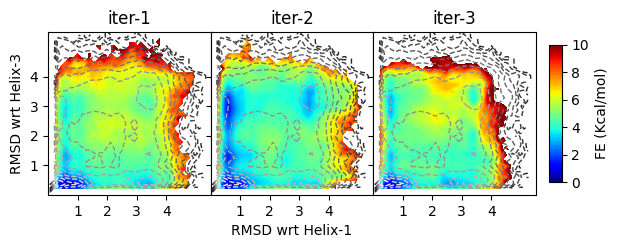

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(6.5,2.5), sharex=True, sharey=True)
axs = axs.reshape([-1])


# calculate the unbiased FES from DESRES data 
desres_rmsd = np.load('desres_rmsd_data.npy')
x = desres_rmsd[:,0]  # helix-1
y = desres_rmsd[:,2]  # helix-3
H_ref, xedges, yedges = np.histogram2d(x, y, bins=40, density=True)

xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2

H_ref = -kt*np.log(H_ref.T)  
H_ref -= H_ref.min()
xx_ref, yy_ref = np.meshgrid(xcenters, ycenters)

for i in range(num_itr):
    
    if i == 0:
        A = np.load('opes_rmsd_data_10us.npy')
        x = A[:,0]
        y = A[:,2]
        wgts = wgts_data_long[i][::50][1:x.shape[0]+1:]
    else:
        x = collect_rmsd_data[i-1][:,0]
        y = collect_rmsd_data[i-1][:,2]
        wgts = wgts_data_long[i][::5]
    
    print(x.shape, wgts.shape)
    # histogram
    if i==0 or i==1:
        H, xedges, yedges = np.histogram2d(x,y,bins=40,density=True, weights=wgts)
    elif i==2:
        H, xedges, yedges = np.histogram2d(x, y, bins=40, density=True, weights=wgts[1:])
    #else:
    #    H, xedges, yedges = np.histogram2d(x, y, bins=40,density=True, weights=wgts[1:])
        
    xcenters = (xedges[:-1] + xedges[1:]) / 2
    ycenters = (yedges[:-1] + yedges[1:]) / 2
    H = -kt*np.log(H.T)  
    H -= H.min()
    xx, yy = np.meshgrid(xcenters, ycenters)
    
    # plot
    axs[i].set_ylim(0,5.5)
    axs[i].set_xlim(0,5.5)
    axs[i].set_yticks(np.arange(1,5))
    axs[i].set_xticks(np.arange(1,5))
    axs[i].set_box_aspect(1)
    axs[i].set_title("iter-%d"%(i+1))
    #axs[i].grid(which='major', axis='both', color='#808080', linestyle="dashed")
    axs[i].contour(xx_ref, yy_ref, H_ref, levels=15, vmax=10, linestyles="--", cmap='binary', linewidths=1.0)
    im = axs[i].contourf(xx, yy, H, cmap='jet', levels=np.arange(0,10.1,0.1))
    #axs[i].contour(xx, yy, H, levels=15, vmax=10, linestyles="--", cmap='binary')
    axs[i].tick_params(axis='both')
    
axs[1].set_xlabel('RMSD wrt Helix-1')
axs[0].set_ylabel('RMSD wrt Helix-3')
# Create a common colorbar
cbar_ax = fig.add_axes([0.87, 0.25, 0.02, 0.55])  # [x, y, width, height]
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[0,2,4,6,8,10])

# Optionally, add a label to the colorbar
cbar.set_label('FE (Kcal/mol)')
    
#fig.tight_layout()
fig.subplots_adjust(wspace=0, top=0.95, bottom=0.1, right=0.85, left=0.1)

# save 
plt.savefig('new_hp35_2d_fes_rmsd_extend_sim.pdf', format='pdf')

### compute the errors for 2D FES every 100ns for each iteration w.r.t reference D. E. Shaw data 

In [52]:
# Constants and parameters
range_ = [0, 6]
nbins_ = 50
err_list_2d = []
cut_off = 7.5  # in kcal/mol
epsilon = 1e-10  # small value to avoid log(0)

# Calculate the unbiased FES from DESRES data
desres_rmsd = np.load('desres_rmsd_data.npy')
x = desres_rmsd[:, 0]  # helix-1
y = desres_rmsd[:, 2]  # helix-3

# Calculate reference FES with regularization
H_ref, xedges, yedges = np.histogram2d(x, y, range=[range_, range_], bins=nbins_, density=True)
H_ref = np.maximum(H_ref, epsilon)  # Avoid zeros for log
F_ref = -kt * np.log(H_ref.T)
F_ref -= F_ref.min()

for i in range(3):
    # Load simulation data
    if i == 0:
        A = np.load('opes_rmsd_data_10us.npy')
        x = A[:, 0]
        y = A[:, 2]
        wgts = wgts_data_long[i][::50][1:x.shape[0]+1]
    else:
        x = collect_rmsd_data[i-1][:, 0]
        y = collect_rmsd_data[i-1][:, 2]
        if i == 2:
            wgts = wgts_data_long[i][1::5]
        else:
            wgts = wgts_data_long[i][::5]
    
    print(x.shape, wgts.shape)
    
    if i == 0:
        err_2d = np.empty(100)
        for j in range(1, 101):
            xj = x[:j*2000+1]  # frames every 50ps (increment by 100ns)
            yj = y[:j*2000+1]
            wgts_j = wgts[:j*2000+1]
            
            # Calculate FES with regularization
            H = np.histogram2d(xj, yj, bins=nbins_, density=True, weights=wgts_j, range=[range_, range_])[0]
            H = np.maximum(H, epsilon)  # Avoid zeros for log
            F = -kt * np.log(H.T)
            F -= F.min()
            
            # Calculate MAE only where both F_ref and F are below cutoff
            mask = (F_ref < cut_off) & (F < cut_off)
            if np.any(mask):
                err_2d[j-1] = np.mean(np.abs(F - F_ref)[mask])
            else:
                err_2d[j-1] = np.nan
        
        err_list_2d.append(err_2d)
            
    else:
        err_2d = np.empty(num_files_)
        for j in range(1, num_files_+1):
            xj = x[:j*20000+1]  # frames every 5ps (increment by 100ns)
            yj = y[:j*20000+1]
            wgts_j = wgts[:j*20000+1]
            
            # Calculate FES with regularization
            H = np.histogram2d(xj, yj, bins=nbins_, density=True, weights=wgts_j, range=[range_, range_])[0]
            H = np.maximum(H, epsilon)  # Avoid zeros for log
            F = -kt * np.log(H.T)
            F -= F.min()
            
            # Calculate MAE only where both F_ref and F are below cutoff
            mask = (F_ref < cut_off) & (F < cut_off)
            if np.any(mask):
                err_2d[j-1] = np.mean(np.abs(F - F_ref)[mask])
            else:
                err_2d[j-1] = np.nan
        
        err_list_2d.append(err_2d)

(209368,) (209368,)
(702241,) (702241,)
(700000,) (700000,)


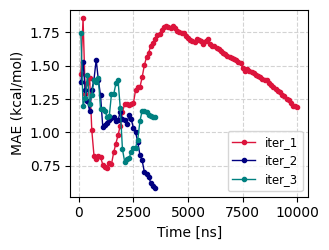

In [53]:
plt.figure(figsize=(3.3,2.6))
plt.ylabel('MAE (kcal/mol)')
plt.xlabel('Time [ns]')
for i in range(3):
    plt.plot((np.arange(err_list_2d[i].shape[0])+1)*100, err_list_2d[i], '.-', label='iter_%d'%(i+1), lw=1, color=colors[i])
plt.grid(axis='both', which='major', ls='--', color='lightgrey')
plt.legend(fontsize='small', loc='lower right')
plt.tight_layout()

# save 
plt.savefig('hp35_2d_error_convg.pdf', format='pdf')

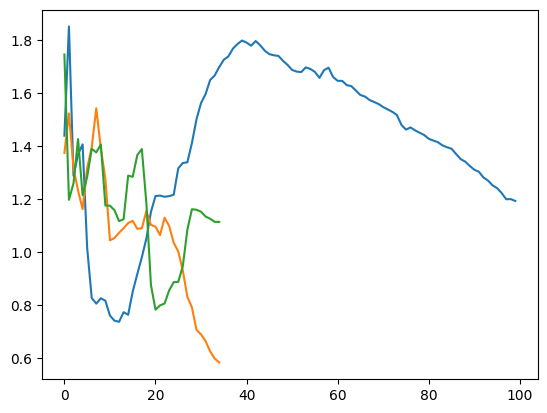

In [54]:
for i in range(3):
    plt.plot(err_list_2d[i])

### MT figure : hp35 : 2D FES, the first two iterations (project upon desres FES)

In [55]:
def plot_log_likelihood_with_dd(axis,cluster_array,train_log_lik,valid_log_lik,fontsize=16,xlabel=True,ylabel1=True,ylabel2=True, legend=True):
    """
    Plot log likelihood as a function of number of clusters for both training and cross validation.  These will be computed as the average over provided training sets.  Also compute and plot the second derivative of the training set data.
    Inputs:
        axis                    (required)  : matplotlib axis object
        cluster_array           (required)  : (n_clusters) int numpy array of number of clusters (x-values for this plot)
        train_log_lik           (required)  : (n_clusters, n_training_sets) float numpy array of log likelihood for training sets
        valid_log_lik           (required)  : (n_clusters, n_training_sets) float numpy array of log likelihood for CV sets
        fontsize                (optional)  : int defining fontsize to be used in the ploat, default is 16
        xlabel                  (optional)  : boolean defining whether or not to put an xlabel, default is True
        ylabel1                 (optional)  : boolean defining whether or not to put a left ylabel, default is True
        ylabel2                 (optional)  : boolean defining whether or not to put a right ylabel, default is True
        legend                  (optional)  : boolean defining whether or not to put a legend
    """
    colors = ["red", "blue", "black"]
    # Training Data
    train_mean = np.mean(train_log_lik,axis=1)
    train_std = np.std(train_log_lik,axis=1)
    axis.errorbar(cluster_array,train_mean,train_std,fmt='-o',lw=1,capsize=1,c=colors[0],label="Train")
    # Validation
    valid_mean = np.mean(valid_log_lik,axis=1)
    valid_std = np.std(valid_log_lik,axis=1)
    axis.errorbar(cluster_array,valid_mean,valid_std,fmt='--x',lw=1,capsize=1,c=colors[1],label="Cv")
    # Second derivative
    ax2 = axis.twinx()
    ax2.set_box_aspect(1)
    n_samples = train_log_lik.shape[1]
    n_clusters = train_log_lik.shape[0]
    dd = np.empty(train_log_lik.shape)
    for sample in range(n_samples):
        dd[:,sample] = np.gradient(np.gradient(train_log_lik[:,sample]))
    dd_mean = np.mean(dd,axis=1)
    dd_std = np.std(dd,axis=1)
    ax2.errorbar(cluster_array,dd_mean,dd_std,fmt='-^',lw=1,capsize=1,alpha=0.75,c=colors[2])
    #
    axis.grid(which='major', axis='both', color='#808080', linestyle='--')
    if ylabel1==True:
        axis.set_ylabel("LL per Frame",fontsize=fontsize)
    if ylabel2==True:
        ax2.set_ylabel("2$^{nd}$ derivative",fontsize=fontsize,color=colors[2])
    if xlabel==True:
        axis.set_xticks(cluster_array)
        axis.set_xlabel("Number of Clusters",fontsize=fontsize)
    ax2.tick_params(axis='both',labelsize=fontsize,labelcolor=colors[2])
    axis.tick_params(axis='both',labelsize=fontsize)
    if legend==True:
        axis.legend(fontsize="small", loc="lower right")

### SI figure: HP35 : Training curve

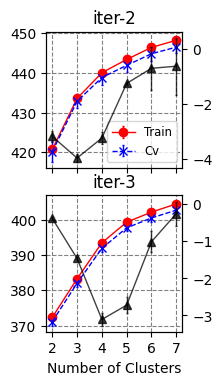

In [56]:
cluster_array = np.arange(2,8)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(3.3,4))
axs = axs.reshape([-1])

for i in range(num_itr-1):
    #axs[i].set_box_aspect(1)
    axs[i].set_title("iter-%d"%(i+2))
    path = "itr_%d"%(i+2)
    train = np.loadtxt(path+"/train.dat")[:,1:]
    cv = np.loadtxt(path+"/cv.dat")[:,1:]

    if i == 0:
        plot_log_likelihood_with_dd(axs[i], cluster_array, train, cv, fontsize=10, ylabel1=False, ylabel2=False, xlabel=False, legend=True)
    elif i == 1:
        plot_log_likelihood_with_dd(axs[i], cluster_array, train, cv, fontsize=10, ylabel1=False, ylabel2=False, xlabel=True, legend=False)
    #else :
        #plot_log_likelihood_with_dd(axs[i], cluster_array, train, cv, fontsize=12, ylabel1=False, ylabel2=False, xlabel=True, legend=False)

fig.subplots_adjust(wspace=0.3, left=0.1, right=0.9, bottom=0.15, top=0.9)
#fig.tight_layout()

# save 
plt.savefig("new_hp35_train_curve.pdf", format="pdf")

In [57]:
logb_dist_data = []
for i in range(2):
    x = np.loadtxt('itr_%d/logb-dist.txt'%(i+2))
    logb_dist_data.append(x)
print(logb_dist_data)

[array([[0.96144711, 3.96314494],
       [2.63882979, 3.6252176 ],
       [3.59226011, 2.67873537]]), array([[2.670111  , 3.87484003],
       [0.54039282, 4.00021824],
       [4.43410164, 2.52348984],
       [3.51104436, 3.02506022]])]


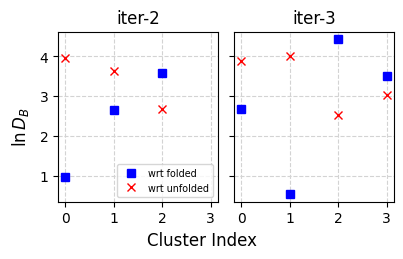

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(4,2.5), sharey=True, sharex=True)
fig.supxlabel('Cluster Index')
fig.supylabel('$\ln{D_B}$')

for i in range(2):
    #axs[i].set_aspect(1)
    axs[i].set_title('iter-%d'%(i+2))
    axs[i].grid(axis='both', which='major', linestyle='--', color='lightgrey')
    axs[i].set_xticks(np.arange(4))
    for j in range(logb_dist_data[i].shape[0]):
        if i ==0 and j ==0:
            axs[i].plot(j, logb_dist_data[i][j,0], 's', color='b', ms=6, label='wrt folded')
            axs[i].plot(j, logb_dist_data[i][j,1], 'x', color='r', ms=6, label='wrt unfolded')
        else:
            axs[i].plot(j, logb_dist_data[i][j,0], 's', color='b', ms=6)
            axs[i].plot(j, logb_dist_data[i][j,1], 'x', color='r', ms=6)
    if i ==0 :      
        axs[i].legend(fontsize='x-small', loc='lower right')

fig.subplots_adjust(wspace=0.1, bottom=0.2, right=0.98, top=0.88, left=0.14)
#fig.tight_layout()

# save 
plt.savefig('new_logb_dist_hp35.pdf', format='pdf')